# Import Data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['PG', 'BEI.DE']
start_date = '2007-01-01'

sec_data = pd.DataFrame()

for t in tickers:      
    sec_data[t] = yf.download(t, start=start_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
sec_data

,PG,BEI.DE
Date,,
2007-01-03,38.616379,41.022572
2007-01-04,38.323204,41.291920
2007-01-05,37.994137,40.443062
2007-01-08,38.077892,40.451221
2007-01-09,37.982174,39.537067
...,...,...
2024-12-24,168.940002,NaN
2024-12-26,170.160004,NaN
2024-12-27,169.529999,123.199997


In [3]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4530 entries, 2007-01-03 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      4530 non-null   float64
 1   BEI.DE  4454 non-null   float64
dtypes: float64(2)
memory usage: 106.2 KB


# Calculate Log Return

In [4]:
import numpy as np

sec_returns = np.log(sec_data / sec_data.shift(1))

In [5]:
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2024-12-24,0.004925,NaN
2024-12-26,0.007196,NaN
2024-12-27,-0.003709,NaN


# Calculate Stocks Variance 

In [6]:
PG_var_a = sec_returns['PG'].var() * 250
PG_var_a

0.03371387163990458

In [7]:
BEI_var_a = sec_returns['BEI.DE'].var() * 250
BEI_var_a

0.04490360681331532

In [8]:
PG_var_a ** 0.5

0.1836133754384592

In [9]:
BEI_var_a ** 0.5

0.21190471163547855

In [10]:
weights = np.array([0.5, 0.5])

In [11]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.02482814116884441

# Diversifiable Risk

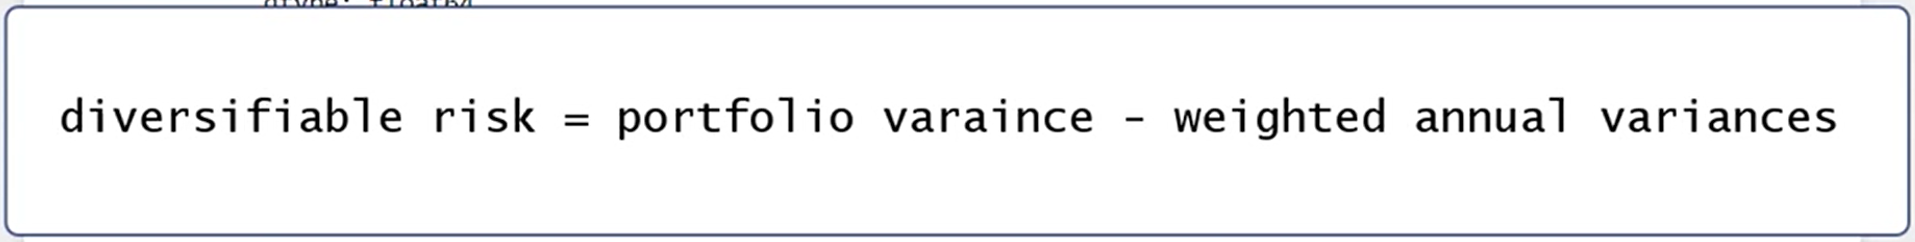

In [12]:
dr = pfolio_var - (weights[0] ** 2 * PG_var_a) - (weights[1] ** 2 * BEI_var_a)
dr

0.0051737715555394345

In [13]:
print (str(round(dr, 5) * 100) + '%')

0.517%


# Non-diversifiable Risk

In [14]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.019654369613304974

In [15]:
n_dr_2 = (weights[0] ** 2 * PG_var_a) + (weights[1] ** 2 * BEI_var_a)
n_dr_2

0.019654369613304974

In [16]:
n_dr_1 == n_dr_2

True